In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Text Mining/F1DriversDataset.csv')

In [4]:
data.to_csv('new_file_before_preprocessing.csv', index=False)

In [7]:
data['Driver'].head()

0          Carlo Abate
1     George Abecassis
2        Kenny Acheson
3    Andrea de Adamich
4       Philippe Adams
Name: Driver, dtype: object

In [8]:
data.dropna(subset = ["Driver"], inplace=True)

data.to_csv('new_driver_file_before_preprocessing.csv', index=False)

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
datanew = data.Driver.str.cat(sep='')
print (datanew)

Carlo AbateGeorge AbecassisKenny AchesonAndrea de AdamichPhilippe AdamsWalt AderKurt AdolffFred AgabashianKurt Ahrens Jr.Jack AitkenChristijan AlbersAlexander AlbonMichele AlboretoJean AlesiJaime AlguersuariPhilippe AlliotCliff AllisonFernando AlonsoGiovanna AmatiGeorge AmickRed AmickChris AmonBob AndersonConny AnderssonEmil AndresMario AndrettiMichael AndrettiKeith AndrewsElio de AngelisMarco ApicellaMário de Araújo CabralFrank ArmiChuck ArnoldRené ArnouxPeter ArundellAlberto AscariPeter AshdownIan AshleyGerry AshmoreBill AstonRichard AttwoodManny AyuloLuca BadoerGiancarlo BaghettiJulian BaileyMauro BaldiBobby BallMarcel BalsaLorenzo BandiniHenry BanksFabrizio BarbazzaJohn BarberSkip BarberPaolo BarillaRubens BarrichelloMichael BartelsEdgar BarthGiorgio BassiErwin BauerZsolt BaumgartnerÉlie BayolDon BeaumanKarl-Günther Bechem[g]Jean BehraDerek BellStefan BellofPaul BelmondoTom BelsøJean-Pierre BeltoiseOlivier BerettaAllen BergGeorges BergerGerhard BergerÉric BernardEnrique BernoldiEnr

In [12]:
#tokenize words
words = nltk.tokenize.word_tokenize(datanew)

#count word
word_dist = nltk.FreqDist(words)

#menampilkan 10 kata pertama dengan frequensi terbanyak
top_N = 100

#menampilkan kata dalam table dan menghitung frequensi nya - include stopwords
print("Word Frequency before remove stopword")
print('All frequency, includeing STOPWORDS:')
print('='*60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns = ['Word', 'Frequency']).set_index('Word')

print(rslt)
print('='*60)

Word Frequency before remove stopword
All frequency, includeing STOPWORDS:
                Frequency
Word                     
de                     21
van                     6
der                     3
[                       2
]                       2
...                   ...
BianchiGino             1
BiancoHans              1
BinderClemente          1
BiondettiPablo          1
BirgerArt               1

[100 rows x 1 columns]


<Figure size 21600x21600 with 0 Axes>

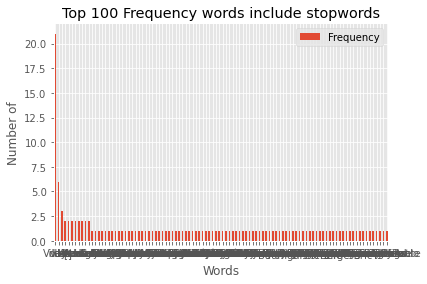

<Figure size 21600x21600 with 0 Axes>

In [13]:
import matplotlib
import matplotlib.pyplot as plt

#print plotnya
matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)

#label for x
plt.xlabel('Words')
plt.ylabel('Number of')

#x axis label rotation 
plt.title('Top 100 Frequency words include stopwords')

plt.figure(figsize=(300,300))

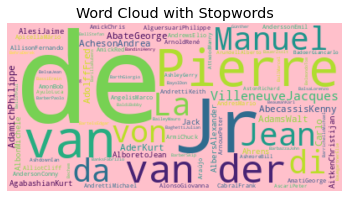

<Figure size 432x288 with 0 Axes>

In [14]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(background_color="pink").generate(datanew)

#display the generated image with stopword:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud with Stopwords')
plt.axis("off")
plt.show()
plt.savefig('wordcloud with stopwords.jpg')